In [33]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from pathlib import Path
repo_dir = Path().resolve().parent

In [2]:
df = pd.read_csv(repo_dir / "data" / "BTC_and_ETFs.csv")

In [3]:
coins = ["ARKB", "FBTC", "IBIT", "GBTC", "BTC"]
df_long = df[["time_NY"] + [f"open_{coin}" for coin in coins]].melt(id_vars = "time_NY", var_name = "variable", value_name = "value")

In [4]:
df_long

,time_NY,variable,value
0,2024-01-11 04:00:00-05:00,open_ARKB,50.00
1,2024-01-11 04:04:00-05:00,open_ARKB,50.00
2,2024-01-11 04:06:00-05:00,open_ARKB,50.00
3,2024-01-11 04:08:00-05:00,open_ARKB,50.00
4,2024-01-11 04:09:00-05:00,open_ARKB,50.00
...,...,...,...
971045,2024-12-24 16:55:00-05:00,open_BTC,98314.14
971046,2024-12-24 16:56:00-05:00,open_BTC,98303.21
971047,2024-12-24 16:57:00-05:00,open_BTC,98292.67
971048,2024-12-24 16:58:00-05:00,open_BTC,98312.74


In [5]:
# sns.lineplot(data = df_long, x = "time_NY", y = "value", hue = "variable")
# plt.show()

In [44]:
daily = df.copy()
daily["daily"] = pd.to_datetime(daily.timestamp, unit='ms')
daily.set_index("daily", inplace = True)
daily = daily.resample('D').first()
daily["days"] = np.arange(1, len(daily)+1)
daily = daily.dropna()

In [48]:
daily

,timestamp,time_NY,open_ARKB,open_FBTC,open_IBIT,open_GBTC,open_BTC,per_ARKB,per_FBTC,per_IBIT,per_GBTC,per_FBTC.1,days
daily,,,,,,,,,,,,,
2024-01-11,1.704964e+12,2024-01-11 04:00:00-05:00,50.0000,41.99,26.77,40.50,46281.32,0.0,0.000000,0.000000,0.000000,0.000000,1
2024-01-12,1.705018e+12,2024-01-11 19:00:00-05:00,46.9600,41.15,26.80,41.04,46344.96,0.0,0.000000,-0.000373,0.000000,0.000000,2
2024-01-13,1.705104e+12,2024-01-12 19:00:00-05:00,42.7300,37.81,24.46,37.37,42775.10,0.0,-0.004214,0.000000,-0.006117,-0.004214,3
2024-01-16,1.705396e+12,2024-01-16 04:00:00-05:00,43.1300,37.95,24.94,37.60,42969.42,0.0,0.000000,0.008492,0.000799,0.000000,6
2024-01-17,1.705450e+12,2024-01-16 19:05:00-05:00,43.4400,37.87,24.68,38.29,43143.80,0.0,-0.000792,0.000000,0.000000,-0.000792,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-19,1.734566e+12,2024-12-18 19:00:00-05:00,99.7500,87.41,56.91,79.42,100148.60,0.0,0.000801,0.000176,0.001387,0.000801,344
2024-12-20,1.734653e+12,2024-12-19 19:01:00-05:00,97.5700,85.12,55.44,77.24,97576.54,0.0,0.000000,0.000722,0.000000,0.000000,345
2024-12-21,1.734739e+12,2024-12-20 19:00:00-05:00,97.9953,85.45,55.88,78.78,97762.75,0.0,0.000000,0.000179,0.000000,0.000000,346


In [45]:


detrended_normalized = daily.copy()
for coin in coins:
    slope, intercept, _, _, _ = linregress(detrended_normalized.days, detrended_normalized[f"open_{coin}"])
    trend = slope * detrended_normalized.days + intercept
    detrended_normalized[f"open_{coin}"] = detrended_normalized[f"open_{coin}"] - trend
    detrended_normalized[f"open_{coin}"] = (detrended_normalized[f"open_{coin}"] - detrended_normalized[f"open_{coin}"].mean()) / detrended_normalized[f"open_{coin}"].std()
detrended_normalized_long = detrended_normalized[["days"] + [f"open_{coin}" for coin in coins]].melt(id_vars = "days", var_name = "variable", value_name = "value")

    

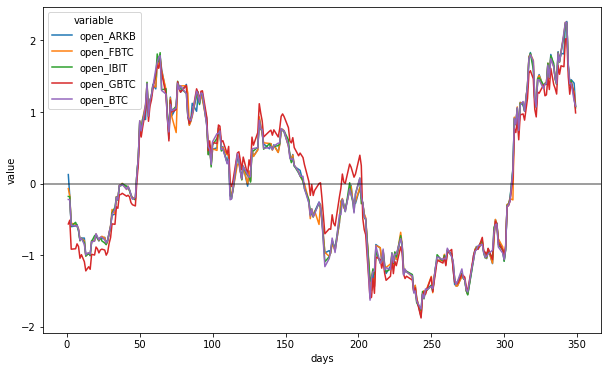

In [52]:
plt.figure(figsize=(10, 6))
sns.lineplot(data = detrended_normalized_long, x = detrended_normalized_long.days, y = "value", hue = "variable")
plt.axhline(0, color = "black", alpha = .5)
plt.show()